In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from sqlalchemy import create_engine
from datetime import date, timedelta
import calendar

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from itables import show
pd.options.display.max_rows = 31

engine = create_engine("sqlite:///c:\\ruby\\expense\\db\\development.sqlite3")
conn = engine.connect()
today = date.today()
today

datetime.date(2023, 8, 31)

In [2]:
sql = "SELECT C.id, C.name AS item, G.name AS kind, G.id FROM categories C \
       JOIN groups G ON group_id = G.id"
df_c = pd.read_sql(sql, conn)
df_c.head()

,id,item,kind,id
0,1,Books & Software,Edutainment,3
1,2,CCF,Luxury,5
2,3,Cigarette,Luxury,5
3,4,Food,Food,4
4,5,Fuel,Transportation,10


In [3]:
# create a date object
date = pd.to_datetime('2023-08-31')

# find the beginning of the month for the given date
bom = date.to_period('M').start_time
eom = date.to_period('M').end_time
bom = bom.date()
eom = eom.date()
print(f'Month start: {bom}')
print(f'Month end: {eom}')

Month start: 2023-08-01
Month end: 2023-08-31


In [4]:
sql = """
SELECT date,amount,C.name AS item, G.name AS kind FROM transactions T 
JOIN categories C ON category_id = C.id 
JOIN groups G ON group_id = G.id 
WHERE date = "%s" 
ORDER BY amount DESC
"""
sql = sql % eom
print(sql)

df = pd.read_sql(sql, conn)
df


SELECT date,amount,C.name AS item, G.name AS kind FROM transactions T 
JOIN categories C ON category_id = C.id 
JOIN groups G ON group_id = G.id 
WHERE date = "2023-08-31" 
ORDER BY amount DESC



,date,amount,item,kind
0,2023-08-31,10000,Parent,Parent
1,2023-08-31,1050,MidJourney,Edutainment
2,2023-08-31,710,ChatGPT,Edutainment
3,2023-08-31,640,Internet Home,Communication
4,2023-08-31,420,Netflix,Edutainment
5,2023-08-31,320,Telephone Dtac,Communication
6,2023-08-31,190,Food,Food
7,2023-08-31,170,Google,Edutainment
8,2023-08-31,100,Apple,Edutainment
9,2023-08-31,40,Apple,Edutainment


In [5]:
formatted_amt = '{:,.2f}'.format(df.amount.sum())
print(formatted_amt)

13,640.00


In [6]:
sql = """
SELECT date,amount,C.name AS item, G.name AS kind FROM transactions T 
JOIN categories C ON category_id = C.id 
JOIN groups G ON group_id = G.id 
WHERE date = "%s" 
ORDER BY amount DESC
"""
sql = sql % (eom)
print(sql)

df_eom = pd.read_sql(sql, conn)
df_eom


SELECT date,amount,C.name AS item, G.name AS kind FROM transactions T 
JOIN categories C ON category_id = C.id 
JOIN groups G ON group_id = G.id 
WHERE date = "2023-08-31" 
ORDER BY amount DESC



,date,amount,item,kind
0,2023-08-31,10000,Parent,Parent
1,2023-08-31,1050,MidJourney,Edutainment
2,2023-08-31,710,ChatGPT,Edutainment
3,2023-08-31,640,Internet Home,Communication
4,2023-08-31,420,Netflix,Edutainment
5,2023-08-31,320,Telephone Dtac,Communication
6,2023-08-31,190,Food,Food
7,2023-08-31,170,Google,Edutainment
8,2023-08-31,100,Apple,Edutainment
9,2023-08-31,40,Apple,Edutainment


In [7]:
sql = """
SELECT date,amount,C.name AS item, G.name AS kind FROM transactions T 
JOIN categories C ON category_id = C.id 
JOIN groups G ON group_id = G.id 
WHERE date BETWEEN "%s" AND "%s" 
ORDER BY date
"""
sql = sql % (bom, eom)
print(sql)

df_t = pd.read_sql(sql, conn)
df_t.tail()


SELECT date,amount,C.name AS item, G.name AS kind FROM transactions T 
JOIN categories C ON category_id = C.id 
JOIN groups G ON group_id = G.id 
WHERE date BETWEEN "2023-08-01" AND "2023-08-31" 
ORDER BY date



,date,amount,item,kind
17,2023-08-31,170,Google,Edutainment
18,2023-08-31,100,Apple,Edutainment
19,2023-08-31,40,Apple,Edutainment
20,2023-08-31,710,ChatGPT,Edutainment
21,2023-08-31,1050,MidJourney,Edutainment


In [8]:
grouped = df_t.groupby("item")
grouped['amount'].sum()

item
Apple                140
ChatGPT              710
Food                1650
Fuel                1420
Google               170
Internet Home        640
Medicine            8640
MidJourney          1050
Mother            283260
Netflix              420
Parent             10000
Personal Care        250
Pets               14040
Telephone Dtac       320
Transportation       500
Name: amount, dtype: int64

In [9]:
grouped = df_t.groupby("kind")
grouped['amount'].sum()

kind
Apparel              250
Communication        960
Edutainment         2490
Food                1650
Medicine            8640
Mother            283260
Parent             10000
Pets               14040
Transportation      1920
Name: amount, dtype: int64

In [10]:
expense = grouped.amount.sum()
sum(expense)

323210

<Figure size 864x864 with 0 Axes>

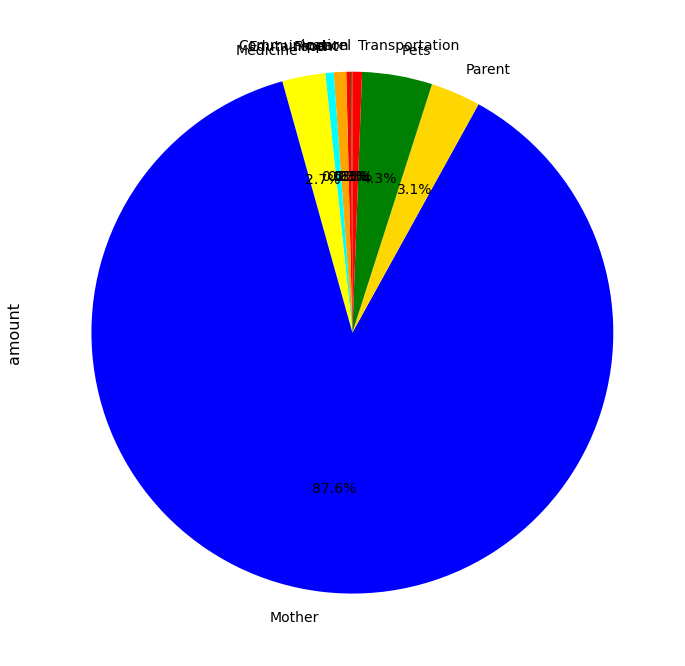

In [11]:
fig_path = "../fig/Expense-2308.png"
with plt.style.context("my_custom_style"):
    plt.figure(figsize=(12, 12))
    ax = expense.plot.pie(
        colors=["green", "red", "orange", "cyan", "yellow", "blue", "gold"],
        startangle=90,
        autopct="%1.1f%%",
    )
    plt.savefig(fig_path)

In [12]:
expense.to_csv("../data/expense-2308.csv")

In [13]:
sql = """
SELECT date,amount,C.name AS item, G.name AS kind FROM transactions T 
JOIN categories C ON category_id = C.id 
JOIN groups G ON group_id = G.id 
WHERE date = "%s" 
ORDER BY date
"""
sql = sql % (eom)
print(sql)


SELECT date,amount,C.name AS item, G.name AS kind FROM transactions T 
JOIN categories C ON category_id = C.id 
JOIN groups G ON group_id = G.id 
WHERE date = "2023-08-31" 
ORDER BY date



In [14]:
df_tmp = pd.read_sql(sql, conn)
show(df_tmp[['date','amount','item','kind']])

<IPython.core.display.Javascript object>

date,amount,item,kind


In [15]:
df_tmp.to_csv("../data/expense-eom.csv")

In [16]:
sql = "SELECT * FROM groups"
groups = pd.read_sql(sql, conn)
groups.dtypes

id             int64
name          object
created_at    object
updated_at    object
factor4       object
dtype: object

In [17]:
groups

,id,name,created_at,updated_at,factor4
0,1,Apparel,2016-01-01 13:38:53.119230,2016-01-01 13:38:53.119230,2
1,2,Communication,2016-01-01 13:38:53.199234,2016-01-01 13:38:53.199234,5
2,3,Edutainment,2016-01-01 13:38:53.289240,2016-01-01 13:38:53.289240,6
3,4,Food,2016-01-01 13:38:53.356243,2016-01-01 13:38:53.356243,1
4,5,Luxury,2016-01-01 13:38:53.422247,2016-01-01 13:38:53.422247,6
5,6,Medicine,2016-01-01 13:38:53.498252,2016-01-01 13:38:53.498252,4
6,7,Others,2016-01-01 13:38:53.564255,2016-01-01 13:38:53.564255,6
7,8,Parent,2016-01-01 13:38:53.622259,2016-01-01 13:38:53.622259,7
8,9,Shelter,2016-01-01 13:38:53.689263,2016-01-01 13:38:53.689263,3
9,10,Transportation,2016-01-01 13:38:53.764267,2016-01-01 13:38:53.764267,5


In [18]:
sql = "SELECT * FROM categories"
categories = pd.read_sql(sql, conn)
categories.dtypes

id             int64
sequence       int64
name          object
default        int64
group_id       int64
created_at    object
updated_at    object
dtype: object

In [19]:
categories

,id,sequence,name,default,group_id,created_at,updated_at
0,1,4,Books & Software,0,3,2016-01-01 14:34:11.909054,2016-01-01 14:34:11.909054
1,2,19,CCF,600,5,2016-01-01 14:34:11.976058,2016-01-01 14:34:11.976058
2,3,2,Cigarette,0,5,2016-01-01 14:34:12.067063,2016-01-01 14:34:12.067063
3,4,1,Food,0,4,2016-01-01 14:34:12.148068,2016-01-01 14:34:12.148068
4,5,3,Fuel,0,10,2016-01-01 14:34:12.209071,2016-01-01 14:34:12.209071
...,...,...,...,...,...,...,...
36,37,74,Yearly Pluralsight,3300,3,2021-12-30 15:45:55,2021-12-30 15:45:55
37,38,75,Yearly Dropbox,4450,3,2022-01-16 15:44:51,2022-01-16 15:44:51
38,39,76,Netflix,420,3,2022-06-30 15:12:52,2022-06-30 15:12:52
39,40,77,ChatGPT,690,3,2023-03-31 16:02:59,2023-03-31 16:02:59


In [20]:
sql = "SELECT * FROM transactions"
transactions = pd.read_sql(sql, conn)
transactions.dtypes

id              int64
date           object
category_id     int64
amount          int64
created_at     object
updated_at     object
dtype: object

In [21]:
transactions.tail()

,id,date,category_id,amount,created_at,updated_at
2621,2654,2023-08-31,32,170,2023-08-31 15:46:05.733417,2023-08-31 15:46:05.733417
2622,2655,2023-08-31,30,100,2023-08-31 15:46:20.015265,2023-08-31 15:46:20.015265
2623,2656,2023-08-31,30,40,2023-08-31 15:46:27.316368,2023-08-31 15:46:27.316368
2624,2657,2023-08-31,40,710,2023-08-31 15:47:07.102901,2023-08-31 15:47:07.102901
2625,2658,2023-08-31,41,1050,2023-08-31 15:47:29.026214,2023-08-31 15:47:29.026214
